# SJ Chatbot: Prepare Documents

## Set up environment 

## Load-in operations manual

In [1]:
from docx import Document

# Replace 'your_document.docx' with your actual Word document file name
doc = Document("operations_manual.docx")

# Print the text in the document
for para in range(20):
    print(doc.paragraphs[para].text)


About us

Saint James Backpackers is a family owned hostel, only a 5-minute walk from the Earls Court Tube/Metro station (District Line and Piccadilly Line). 

What we can offer to our guest? 
Central London location (Zone 1)
A hostel with new beds, mattresses, furniture, bathrooms etc.
Free 300Mb WiFi
Massive patio garden
Large lounge with 75'' HD TV (with Netflix and Sky TV)
Free use of PS5, board games and guitar
Free London map 
Irons and hairdryers for loan 
Two dining zones
A new modern communal kitchen
Free Breakfast between 8am till 9.45am. Self-service (4 types of cereals, toast bread, jam, peanut butter, coffee, tea, milk and margarine, pancakes, juice , croissants). 
Free 24 hour tea & coffee, as well as seasonings and often free food for cooking.
A building combining original Victorian architecture with modern amenities
For the ladies, an exclusive ladies-only private dorm and showers in the basement, as well as a make-up area on the ground floor.


## Remove spaces

In [2]:
no_spaces = []
for i in range(len(doc.paragraphs)):
    para = doc.paragraphs[i].text
    if (para != '') & (para != ' '):
        no_spaces.append(doc.paragraphs[i].text)

# prints the text in the document
for para in range(20):
    print(no_spaces[para])

About us
Saint James Backpackers is a family owned hostel, only a 5-minute walk from the Earls Court Tube/Metro station (District Line and Piccadilly Line). 
What we can offer to our guest? 
Central London location (Zone 1)
A hostel with new beds, mattresses, furniture, bathrooms etc.
Free 300Mb WiFi
Massive patio garden
Large lounge with 75'' HD TV (with Netflix and Sky TV)
Free use of PS5, board games and guitar
Free London map 
Irons and hairdryers for loan 
Two dining zones
A new modern communal kitchen
Free Breakfast between 8am till 9.45am. Self-service (4 types of cereals, toast bread, jam, peanut butter, coffee, tea, milk and margarine, pancakes, juice , croissants). 
Free 24 hour tea & coffee, as well as seasonings and often free food for cooking.
A building combining original Victorian architecture with modern amenities
For the ladies, an exclusive ladies-only private dorm and showers in the basement, as well as a make-up area on the ground floor.
Multicultural friendly staff

## Check paragraph word lengths

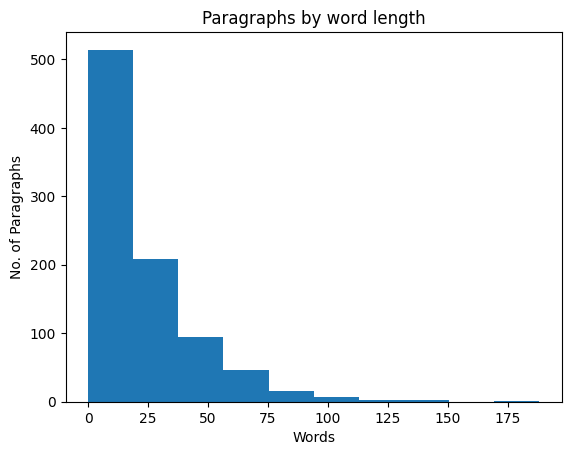

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

word_lengths = []
for i in range(len(no_spaces)):
    word_lengths.append( len([x for x in no_spaces[i].split()]) )

plt.hist(word_lengths);
plt.title('Paragraphs by word length');
plt.xlabel('Words');
plt.ylabel('No. of Paragraphs');
plt.show();

## Guess splits by word length

In [4]:
splits = []
for i in range(len(word_lengths)):
    try:
        if (word_lengths[i] < 6) & (word_lengths[i+1] >9):
            splits.append(i)
    except:
        pass

print('There are ' + str(len(splits)) + ' splits')

There are 144 splits


## Create length breaks

In [5]:
length_breaks = []

current_length = 0

for i in range(len(no_spaces)):
    current_length = current_length + word_lengths[i]
    if current_length > 125:
        length_breaks.append(i)
        current_length = 0

print('There are ' + str(len(length_breaks)) + ' length breaks')

There are 134 length breaks


## Get document sections

### Create final splits

In [6]:
final_splits = []

length_breaks_counter = 0 

for i in range(len(no_spaces)):
    try:
        if i >= length_breaks[length_breaks_counter]:
            relevant_splits = [x for x in splits if x < length_breaks[length_breaks_counter]]
            final_splits.append(max(relevant_splits))
            length_breaks_counter = length_breaks_counter + 1
    except:
        pass

### Create paragraphs function

In [7]:
def create_para(p):
    paragraph = ''
    for i in p:
        
        if len(no_spaces[i]) > 2:
        
            no_spaces[i] = no_spaces[i].strip()
            last_char = no_spaces[i][len(no_spaces[i])-1]
            
            if (last_char != '.') & (last_char != '?'):
                paragraph = paragraph + no_spaces[i] + '. '
            else:
                paragraph = paragraph + no_spaces[i] + ' '
            
    return paragraph

p = range(0, 19)
create_para(p)

"About us. Saint James Backpackers is a family owned hostel, only a 5-minute walk from the Earls Court Tube/Metro station (District Line and Piccadilly Line). What we can offer to our guest? Central London location (Zone 1). A hostel with new beds, mattresses, furniture, bathrooms etc. Free 300Mb WiFi. Massive patio garden. Large lounge with 75'' HD TV (with Netflix and Sky TV). Free use of PS5, board games and guitar. Free London map. Irons and hairdryers for loan. Two dining zones. A new modern communal kitchen. Free Breakfast between 8am till 9.45am. Self-service (4 types of cereals, toast bread, jam, peanut butter, coffee, tea, milk and margarine, pancakes, juice , croissants). Free 24 hour tea & coffee, as well as seasonings and often free food for cooking. A building combining original Victorian architecture with modern amenities. For the ladies, an exclusive ladies-only private dorm and showers in the basement, as well as a make-up area on the ground floor. Multicultural friendl

### Create relevant ranges

In [8]:
ranges = []
splits_counter = 0

for i in range(len(final_splits)):
    ranges.append(range(splits_counter, final_splits[i]))
    splits_counter = final_splits[i]

    if splits_counter == max(final_splits):
        ranges.append(range(final_splits[i], len(no_spaces)))

print('There are ' + str(len(ranges)) + ' ranges')

There are 135 ranges


### Get all paragraphs

In [9]:
df = []
for i in range(len(ranges)):
    p = ranges[i]
    df.append(create_para(p))

final_paragraphs = []
for i in range(len(df)):
    if len(df[i]) > 2:
        final_paragraphs.append(df[i])

print('There are ' + str(len(final_paragraphs)) + ' final paragraphs')

There are 100 final paragraphs


### Check paragraph word lengths

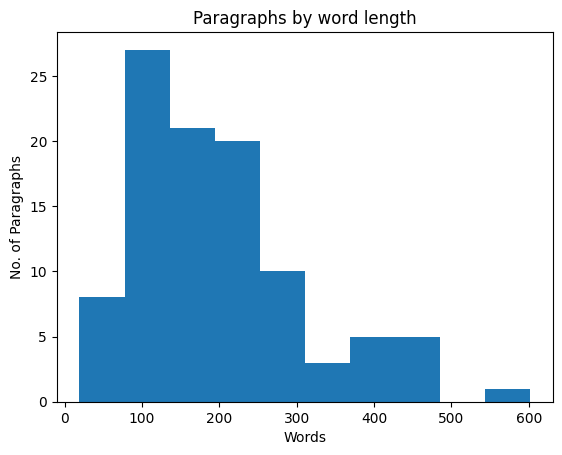

In [10]:
word_lengths = []
for i in range(len(final_paragraphs)):
    word_lengths.append( len([x for x in final_paragraphs[i].split()]) )

plt.hist(word_lengths);
plt.title('Paragraphs by word length');
plt.xlabel('Words');
plt.ylabel('No. of Paragraphs');
plt.show();

## Summarize long sections

### Identify long sections 

In [11]:
long_sections = []
for i in range(len(word_lengths)):
    if word_lengths[i] > 199:
        long_sections.append(i)

print('There are ' + str(len(long_sections)) + ' long sections')

There are 42 long sections


### Summarize with OpenAI

In [12]:
from openai import OpenAI
import os

os.environ["OPENAI_API_KEY"] = "XXX"
client = OpenAI()

def summarize(doc):
    prompt=f"""I have a document below. Summarize it in less than 199 words. 
    Document: {doc}
    """
    response = client.completions.create(
        model="text-davinci-003",
        prompt=prompt,
        temperature=1,
        max_tokens=2000
    )
    return response.choices[0].text.strip()

for i in range(len(long_sections)):
    final_paragraphs[long_sections[i]] = summarize(final_paragraphs[long_sections[i]])

### Check post-summarized word lengths

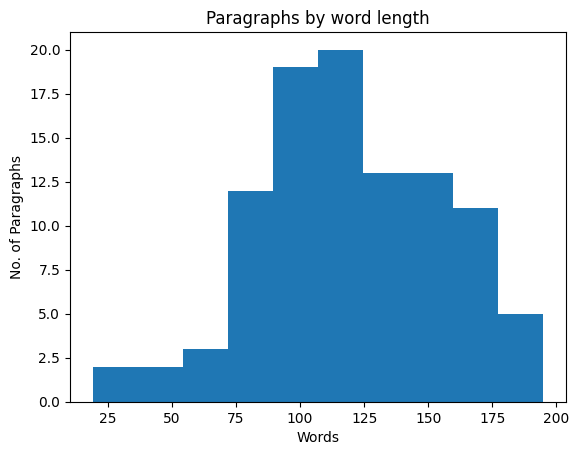

In [13]:
word_lengths = []
for i in range(len(final_paragraphs)):
    word_lengths.append( len([x for x in final_paragraphs[i].split()]) )

plt.hist(word_lengths);
plt.title('Paragraphs by word length');
plt.xlabel('Words');
plt.ylabel('No. of Paragraphs');
plt.show();

## Save to csv

In [14]:
final_section_text = pd.DataFrame({'paragraphs': final_paragraphs})
final_section_text.to_csv('final_paragraph_text.csv', index=False)

## View all paragraphs

In [15]:
for i in range(len(final_paragraphs)):
    print('')
    print(final_paragraphs[i])
    print('')


About us. Saint James Backpackers is a family owned hostel, only a 5-minute walk from the Earls Court Tube/Metro station (District Line and Piccadilly Line). What we can offer to our guest? Central London location (Zone 1). A hostel with new beds, mattresses, furniture, bathrooms etc. Free 300Mb WiFi. Massive patio garden. Large lounge with 75'' HD TV (with Netflix and Sky TV). Free use of PS5, board games and guitar. Free London map. Irons and hairdryers for loan. Two dining zones. 


A new modern communal kitchen. Free Breakfast between 8am till 9.45am. Self-service (4 types of cereals, toast bread, jam, peanut butter, coffee, tea, milk and margarine, pancakes, juice , croissants). Free 24 hour tea & coffee, as well as seasonings and often free food for cooking. A building combining original Victorian architecture with modern amenities. For the ladies, an exclusive ladies-only private dorm and showers in the basement, as well as a make-up area on the ground floor. Multicultural frie